# Ipyniivue and Ipywidgets
## Visualizing Diverse Neuroimaging Formats

**Author**: Monika Doerig

**Date**: 12 Dec 2025

### Citation and Resources:

#### Tools included in this workflow
__Ipyniivue__
- niivue/ipyniivue (2025): A WebGL-powered Jupyter Widget for Niivue based on anywidget. [Computer software]. [https://github.com/niivue/ipyniivue](https://github.com/niivue/ipyniivue)
- Taylor Hanayik, Chris Rorden, Christopher Drake, Jens Ochsenmeier, Matt McCormick, alexis, John lee, Paul Taylor, Edwin Bennink, Paul Wighton, Shun, Anthony Androulakis, Nell Hardcastle, Yaroslav Halchenko, Florian Rupprecht, Guilherme Povala, Korbinian Eckstein, Paul McCarthy, Sumit Jha, … Adam Basha. (2025). niivue/niivue: @niivue/niivue-v0.66.0 (@niivue/niivue-v0.66.0). Zenodo. [https://doi.org/10.5281/zenodo.5786269](https://doi.org/10.5281/zenodo.5786269)

__Ipywidgets__
-  Jupyter Widgets Community. (2015). Jupyter-widgets/ipywidgets (Version 8.1.7) [TypeScript]. Jupyter Widgets. [https://github.com/jupyter-widgets/ipywidgets](https://github.com/jupyter-widgets/ipywidgets) (Original work published 2015)


#### Educational resources
- [Ipyniivue Examples](https://github.com/niivue/ipyniivue/tree/main/examples)
- [Ipynivue Documentation](https://niivue.github.io/ipyniivue/index.html)
- [NiiVue](https://niivue.com/)
- [Ipywidgets Documentation](https://ipywidgets.readthedocs.io/en/stable/)
- [Demo Notebook of Interactive Widgets](https://github.com/jupyter-widgets/ipywidgets/blob/main/docs/source/examples/Index.ipynb)

#### Data
- Example neuroimaging images were obtained from the NiiVue demos resources

## Introduction
This notebook demonstrates how to load, visualize, and interact with a range of common neuroimaging data formats in a Jupyter notebook using Ipyniivue, a Python interface to the Niivue web-based neuroimaging viewer. Examples combine **ipyniivue** with **ipywidgets** to enable interactive exploration and dynamic control of visualization parameters.

The notebook covers voxel-based images, including structural and diffusion-derived volumes (e.g., fractional anisotropy and principal diffusion directions), as well as surface meshes, per-vertex scalar data, CIFTI files, and tractography representations. Together, these examples illustrate how diverse neuroimaging modalities can be displayed within a unified, browser-based visualization environment without requiring a standalone desktop application.

The emphasis is on interactive visualization and data inspection, rather than preprocessing or statistical analysis, with each section highlighting practical patterns for working with different file formats and rendering modes supported by Ipyniivue.

All exampels are inspired by the [ipyniivues example repository](https://github.com/niivue/ipyniivue/tree/main/examples) and have been adapted where necessary to work with **ipyniivue version 2.3.2**.

## Import Python libraries

In [ ]:
%%capture
! pip install ipyniivue==2.3.2

In [6]:
import asyncio
import pathlib
import math

import ipywidgets as widgets
from IPython.display import display, Image

import ipyniivue
from ipyniivue import NiiVue, ShowRender, SliceType, download_dataset, DragMode

## Download required data

In [2]:
# -----------------------------
# Folders
# -----------------------------
DATA_FOLDER = pathlib.Path("./images")
DATA_FOLDER.mkdir(exist_ok=True)

MATCAP_FOLDER = pathlib.Path("./matcaps")
MATCAP_FOLDER.mkdir(exist_ok=True)

# Dataset definitions

DATASETS = [
    # Main neuroimaging datasets
    {
        "api_url": "https://niivue.com/demos/images/",
        "dest_folder": DATA_FOLDER,
        "files": [
            "example4d+orig.HEAD",
            "example4d+orig.BRIK.gz",
            "mni152.nii.gz",
            "narps-4965_9U7M-hypo1_unthresh.nii.gz",
            "narps-4735_50GV-hypo1_unthresh.nii.gz",
            "sub-test02_left_hemisphere.srf.gz",
            "sub-test02_left_hemisphere_4_curvature_maps.smp.gz",
            "fs_LR.32k.L.inflated.surf.gii",
            "fs_LR.32k.LR.curvature.dscalar.nii",
            "Conte69.L.inflated.32k_fs_LR.surf.gii",
            "Conte69.MyelinAndCorrThickness.32k_fs_LR.dtseries.nii",
            "FA.nii.gz",
            "V1.nii.gz",
            "TR_S_R.tt.gz",
            "tract.FAT_R.vtk", #
            "tract.IFOF_R.trk", #
            "tract.SLF1_R.tck", #
            "BrainMesh_ICBM152.lh.mz3" #
        ],
    },
    # FreeSurfer files
    {
        "api_url": "https://niivue.com/demos/images/fs/",
        "dest_folder": DATA_FOLDER, 
        "files": [
            "brainmask.mgz",
            "rh.pial",
            "lh.pial",
            "rh.white",
        ],
    },
    # Matcap images
    {
        "api_url": "https://niivue.com/demos/matcaps",
        "dest_folder": MATCAP_FOLDER,
        "files": [
            "Shiny.jpg",
            "Cortex.jpg",
            "Cream.jpg",
            "Fuzzy.jpg",
            "Peach.jpg",
            "Plastic.jpg",
            "Gold.jpg",
        ],
    },
]

# Download all datasets

for ds in DATASETS:
    ds["dest_folder"].mkdir(exist_ok=True)
    download_dataset(
        api_url=ds["api_url"],
        dest_folder=ds["dest_folder"],
        files=ds["files"],
    )

print("All datasets and matcaps downloaded successfully.")


Dataset downloaded successfully to images.
Dataset downloaded successfully to images.
Dataset downloaded successfully to matcaps.
All datasets and matcaps downloaded successfully.


## 1. Volumetric Neuroimaging Formats


### Multi-Volume Overlay
#### Visualizing anatomical and statistical maps simultaneously in 3D

This example demonstrates the visualization of multiple neuroimaging volumes in a single 3D viewer.

- The base anatomical volume (`mni152.nii.gz`) is displayed in grayscale

- Two statistical maps are overlaid with different colormaps:
    - `narps-4965_9U7M-hypo1_unthresh.nii.gz` in red
    - `narps-4735_50GV-hypo1_unthresh.nii.gz` in green
- Interactive sliders adjust the minimum intensity threshold (`cal_min`) for each overlay
- The 3D crosshair allows inspection of voxel locations
- Colorbar indicates intensity ranges for the overlay volumes.

This setup highlights how multiple volumetric datasets can be integrated and visualized interactively, allowing exploration of anatomical structure alongside functional or statistical results in a single environment.

This example is an adaptation from this [NiiVue demo](https://niivue.com/demos/features/additive.voxels.html).

In [3]:
volumes = [
    {"path": DATA_FOLDER / "mni152.nii.gz"},
    {
        "path": DATA_FOLDER / "narps-4965_9U7M-hypo1_unthresh.nii.gz",
        "colormap": "red",
        "cal_min": 2,
        "cal_max": 4,
    },
    {
        "path": DATA_FOLDER / "narps-4735_50GV-hypo1_unthresh.nii.gz",
        "colormap": "green",
        "cal_min": 2,
        "cal_max": 4,
    },
]
nv1 = NiiVue(
    back_color=(1, 1, 1, 1),
    show_3D_crosshair=True,
    is_colorbar=True,
   
)

nv1.load_volumes(volumes)
nv1.volumes[0].colorbar_visible = False

# Users can dynamically change the minimum intensity (cal_min) for the red and green overlays.
# This allows exploration of which voxels are visible at different thresholds.
# --- Sliders for interactive thresholds ---
sred = widgets.FloatSlider(
    min=0.1, max=4.0, step=0.01, value=1.0, 
    description="Red Min",
)
sgreen = widgets.FloatSlider(
    min=0.1, max=4.0, step=0.01, value=1.0, 
    description="Green Min",
)

# Link sliders to overlay volumes
widgets.link((sred, "value"), (nv1.volumes[1], "cal_min"))
widgets.link((sgreen, "value"), (nv1.volumes[2], "cal_min"))

# --- Combine viewer and sliders in one display ---
controls = widgets.HBox([sred, sgreen])
display(widgets.VBox([nv1, controls]))

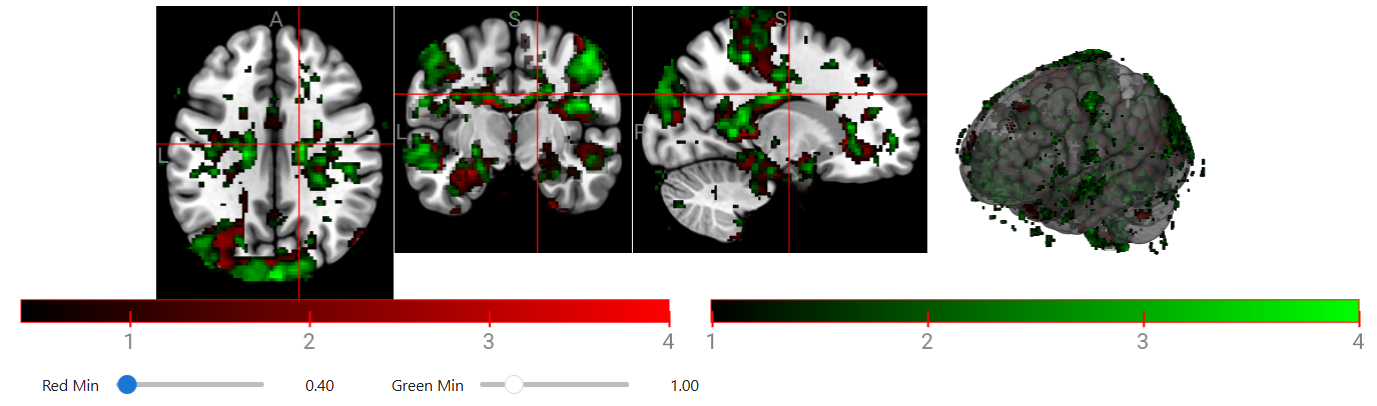

In [1]:
Image(filename='../../static/examples/workflows/ipyniivue_ipywidgets/01_multi_volume.png') 

### AFNI Volumes

This example demonstrates interactive exploration of a 4D AFNI dataset. The viewer displays multiplanar slices alongside NiiVue's built-in graph panel, which plots the voxel-wise time series at the current crosshair position. 

As you navigate through frames or use the animation controls, the graph updates to show intensity values across all timepoints for the selected voxel. The controls allow you to:
- Step through frames manually (Back/Forward buttons)
- Automatically cycle through all frames (Animate button)
- Optionally normalize the graph display for better visualization

This setup demonstrates how 4D neuroimaging data can be explored both spatially (through the multiplanar views) and temporally (through the time series graph), providing a comprehensive view of how signal intensity varies across time at any brain location.


This example mirrors [this NiiVue demo](https://niivue.com/demos/features/afni.html).

In [8]:
# Create the NiiVue widget
nv2 = NiiVue()

nv2.set_radiological_convention(False)
nv2.set_slice_type(SliceType.MULTIPLANAR)
nv2.opts.crosshair_width=0.2
nv2.opts.multiplanar_show_render = ShowRender.ALWAYS

# Configure graph values
nv2.graph.auto_size_multiplanar = True
nv2.graph.normalize_values = False
nv2.graph.opacity = 1.0

# Load 4D volume with paired HEAD and BRIK files
nv2.load_volumes(
    [
        {
            "path": DATA_FOLDER / "example4d+orig.HEAD",
            "paired_img_path": DATA_FOLDER / "example4d+orig.BRIK.gz",
            "colormap": "gray",
            "opacity": 1.0,
            "visible": True,
        },
    ]
)

#### Create other buttons/checkboxes

In [9]:
display_frame = widgets.Label(value="Volume: 0")

normalize_checkbox = widgets.Checkbox(
    value=False,
    description="Normalize Graph",
)

prev_button = widgets.Button(description="Back")
next_button = widgets.Button(description="Forward")

#### Implement the callbacks

In [10]:
def on_normalize_change(change):
    """Normalize graph."""
    nv2.graph.normalize_values = change["new"]


normalize_checkbox.observe(on_normalize_change, names="value")


def on_prev_button_clicked(b):
    """Decrement the frame index."""
    if nv2.volumes:
        current_frame = nv2.volumes[0].frame4D
        new_frame = max(current_frame - 1, 0)
        nv2.volumes[0].frame4D = new_frame
        display_frame.value = f"Volume: {new_frame}"


def on_next_button_clicked(b):
    """Increment the frame index."""
    if nv2.volumes:
        current_frame = nv2.volumes[0].frame4D
        n_frames = nv2.volumes[0].n_frame4D 
        new_frame = min(current_frame + 1, n_frames - 1)
        nv2.volumes[0].frame4D = new_frame
        display_frame.value = f"Volume: {new_frame}"


prev_button.on_click(on_prev_button_clicked)
next_button.on_click(on_next_button_clicked)

#### Create animate button

In [11]:
animate_button = widgets.Button(description="Animate")

animation_running = False
animation_task = None


async def animate_frames():
    """Animation loop."""
    global animation_running
    if not nv2.volumes:
        return
    n_frames = nv2.volumes[0].n_frame4D #n_frame_4d
    try:
        while animation_running:
            current_frame = nv2.volumes[0].frame4D
            current_frame = (current_frame + 1) % n_frames
            nv2.volumes[0].frame4D = current_frame
            display_frame.value = f"Volume: {current_frame}"
            await asyncio.sleep(0.1)
    except asyncio.CancelledError:
        pass


def on_animate_button_clicked(b):
    """Define 'Animate' button click handler."""
    global animation_running, animation_task
    if not animation_running:
        # Start animation
        animation_running = True
        animate_button.description = "Stop"
        # Schedule the animation coroutine and store the future
        animation_task = asyncio.ensure_future(animate_frames())
    else:
        # Stop animation
        animation_running = False
        animate_button.description = "Animate"
        # Cancel the running task if it's active
        if animation_task is not None:
            animation_task.cancel()
            animation_task = None


animate_button.on_click(on_animate_button_clicked)

#### Reset frame index on image loaded

In [12]:
@nv2.on_image_loaded
def update_number_of_frames(volume):
    """Reset to first frame."""
    nv2.volumes[0].frame4D = 0
    display_frame.value = "Volume: 0"

#### Display all

In [13]:
controls = widgets.HBox(
    [
        normalize_checkbox,
        prev_button,
        next_button,
        animate_button,
    ]
)

display(widgets.VBox([controls, display_frame, nv2]))
     

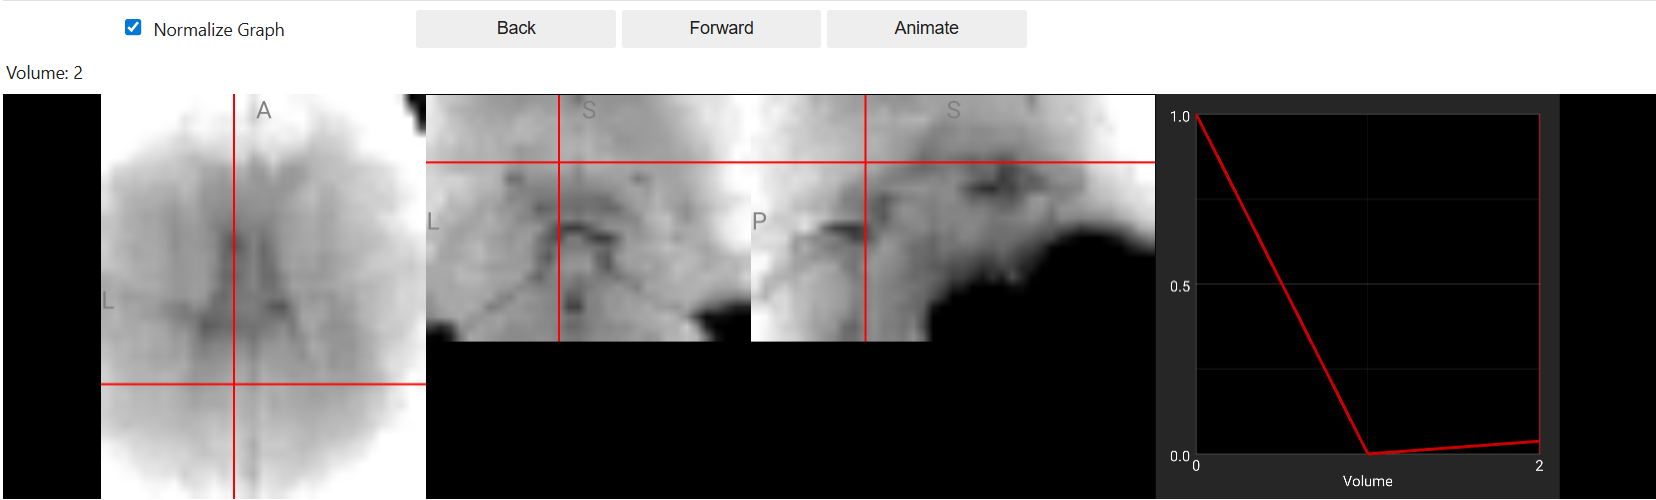

In [2]:
Image(filename='../../static/examples/workflows/ipyniivue_ipywidgets/02_afni_volumes.png') 

### Diffusion-Derived Volumes (FA and V1)
This example demonstrates interactive exploration of voxel-based diffusion metrics. We load fractional anisotropy (FA) and a V1 image as volumetric scalar maps. The V1 image encodes the principal diffusion direction (primary eigenvector) at each voxel, typically representing white matter fiber orientation. Interactive widgets allow you to visualize FA and V1 individually, overlay them, or apply a "Lines" effect (via the V1 slice shader) to highlight directional fiber architecture. The controls let you toggle which volume is visible, apply alpha clipping to improve contrast, and adjust FA intensity ranges. This approach enables examination of diffusion anisotropy alongside fiber orientation patterns without requiring complex modulation methods.

This example mirrors this [NiiVue demo](https://niivue.com/demos/features/modulate.html).

In [15]:
# --- Initialize Viewer ---
nv3 = NiiVue(
    back_color=(1, 1, 1, 1),
    show_3d_crosshair=True,
    multiplanar_show_render=ShowRender.NEVER,
)
nv3.opts.drag_mode = DragMode.PAN
nv3.set_crosshair_width(0.1)

# --- Load Volumes ---
nv3.load_volumes([
    {"path": DATA_FOLDER / "FA.nii.gz"},
    {"path": DATA_FOLDER / "V1.nii.gz"},
])

# Set initial properties
nv3.volumes[0].opacity = 1.0  # FA visible
nv3.volumes[1].opacity = 0.0  # V1 hidden
nv3.opts.is_v1_slice_shader = False # renders directional values as line patterns that visualize fiber orientations

# --- Define Modes Mapping ---
# Each mode maps to: (FA opacity, V1 opacity, use V1 slice shader)
mode_map = {
    "FA":          (1.0, 0.0, False),
    "V1":          (0.0, 1.0, False),
    "V1xFA":       (1.0, 1.0, False),
    "Lines":       (0.0, 1.0, True),
    "LinesxFA":    (1.0, 1.0, True),  # Approximate modulation by combining FA opacity + V1 slice shader
}

# --- UI Widgets ---
modulate_dropdown = widgets.Dropdown(
    options=list(mode_map.keys()),
    value="FA",
    description="Display:",
)

dark_check = widgets.Checkbox(value=True, description="Clip Dark")

slider_min = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=0.0, description="FAmin")
slider_max = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=1.0, description="FAmax")

location_label = widgets.Label(value="Location: ")

# --- Callbacks ---
def update_display(change=None):
    mode = modulate_dropdown.value
    fa_op, v1_op, shader_flag = mode_map[mode]
    nv3.volumes[0].opacity = fa_op
    nv3.volumes[1].opacity = v1_op
    nv3.opts.is_v1_slice_shader = shader_flag

modulate_dropdown.observe(update_display, names="value")

def update_clip(change=None):
    nv3.opts.is_alpha_clip_dark = dark_check.value

dark_check.observe(update_clip, names="value")

def update_contrast(change=None):
    mn, mx = slider_min.value, slider_max.value
    nv3.volumes[0].cal_min = min(mn, mx)
    nv3.volumes[0].cal_max = max(mn, mx)

slider_min.observe(update_contrast, names="value")
slider_max.observe(update_contrast, names="value")

def on_location_change(data):
    if "string" in data:
        location_label.value = "Location: " + data["string"]

nv3.on_location_change(on_location_change)

# --- Initialize ---
update_clip()
update_contrast()
update_display()


# --- Layout ---
ui = widgets.VBox([
    widgets.HBox([modulate_dropdown, dark_check]),
    widgets.HBox([slider_min, slider_max]),
    nv3,
    location_label
])

display(ui)

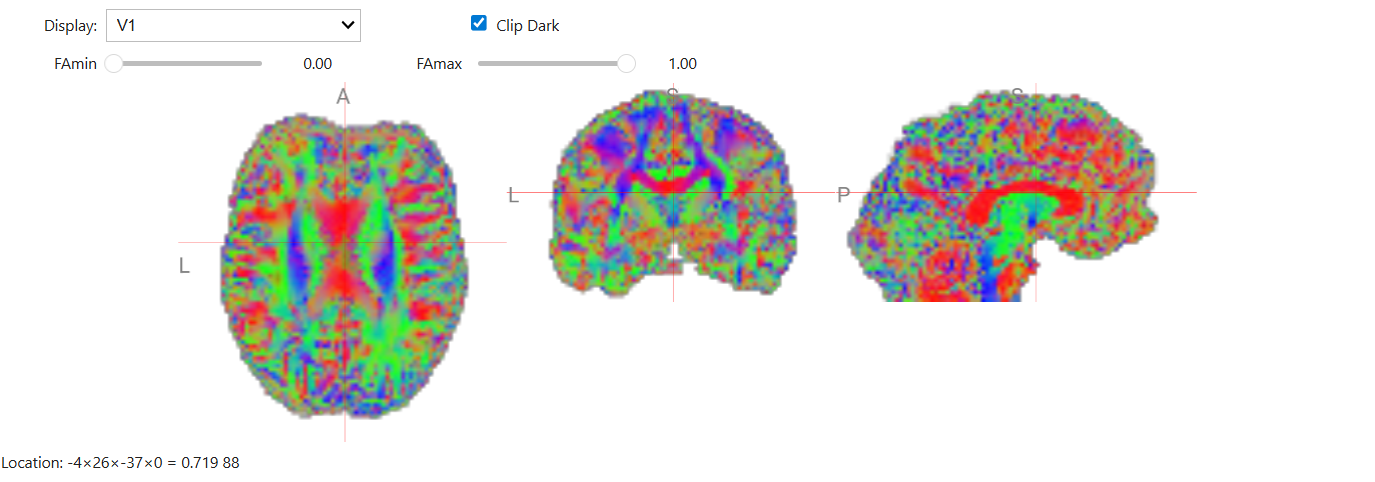

In [3]:
Image(filename='../../static/examples/workflows/ipyniivue_ipywidgets/03_diffusion_metrics.png') 

## 2. Surface-Based Representations

Surface-based neuroimaging methods represent cortical structure and function directly on a two-dimensional mesh that conforms to the cortical sheet. Rather than sampling data in volumetric space, these formats associate scalar values with individual surface vertices, enabling high-resolution visualization of folding patterns, morphometry, and functional or statistical maps. NiiVue supports several widely used surface standards, including FreeSurfer meshes, CIFTI/fsLR hemisphere surfaces, and BrainVoyager SRF/SMP files. The following examples illustrate how to load and render each format, attach per-vertex data layers, and interactively explore mesh-based neuroimaging data.

### FreeSurfer Surfaces

FreeSurfer generates subject-specific cortical surface meshes that explicitly encode geometry and topology in native anatomical space. These surfaces are stored in FreeSurfer’s own binary formats (e.g., `white`, `pial`, `inflated`) and represent the cortical sheet as a triangulated mesh with vertex-wise morphometric information. Unlike CIFTI files, FreeSurfer surfaces directly store geometry, allowing per-vertex measurements to be intrinsically defined on the mesh itself.

NiiVue can load FreeSurfer surface files directly, enabling interactive visualization of native-space cortical meshes and their associated morphometric properties.



In [17]:
# --- Initialize viewer ---
nv4 = NiiVue(slice_type=SliceType.RENDER)
nv4.opts.show_3d_crosshair = True
nv4.opts.back_color = [0, 0, 0, 1]

# --- Load a background volume for clipping ---
nv4.load_volumes([
    {"path": DATA_FOLDER / "mni152.nii.gz", "colormap": "gray", "opacity": 0.9}
])

# --- Load surfaces on top ---
nv4.load_meshes([
    {"path": DATA_FOLDER / "lh.pial", "rgba255": [64, 22, 222, 255]},
    {"path": DATA_FOLDER / "rh.white", "rgba255": [222, 194, 0, 255]},
])

# --- Optional: enable clipping plane ---
default_depth, default_azimuth, default_elevation = 0.0, 270, 0
nv4.set_clip_plane(depth=default_depth, azimuth=default_azimuth, elevation=default_elevation)

# --- Available shaders ---
shader_names = nv4.mesh_shader_names()

# Use the first shader as default
default_shader = shader_names[0] if shader_names else None
if default_shader and nv4.meshes:
    for mesh in nv4.meshes:
        nv4.set_mesh_shader(mesh.id, default_shader)

# Dropdown to change shaders interactively
shader_dropdown = widgets.Dropdown(
    options=shader_names,
    value=default_shader,
    description="Shader",
)

def on_shader_change(change):
    if nv4.meshes:
        for mesh in nv4.meshes:
            nv4.set_mesh_shader(mesh.id, change["new"])

shader_dropdown.observe(on_shader_change, names="value")

# --- Display viewer with controls ---
display(widgets.VBox([shader_dropdown, nv4]))


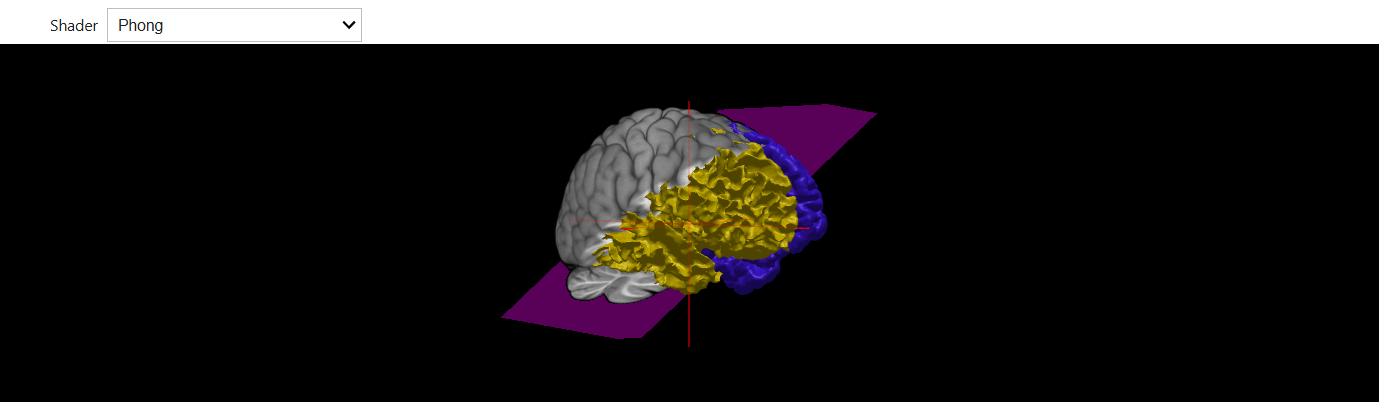

In [4]:
Image(filename='../../static/examples/workflows/ipyniivue_ipywidgets/04_freesurfer.png') 

> **Interactive Clipping Plane**
> 
>When visualizing surfaces together with a reference volume, NiiVue can apply an interactive clipping plane to reveal internal anatomy. 
>
> - Right-click and drag to adjust the clipping plane's angle (azimuth and elevation)
> - Scroll to move the clipping plane along its current orientation
>   
>The clipping plane is optional but particularly useful for understanding the spatial relationship between surface reconstructions and volumetric data.

### 4D Mesh Time Series (CIFTI-2)
#### Applying CIFTI Dense Time Series to a Standard Surface Mesh

>Unlike FreeSurfer surface files, CIFTI files typically do not store surface geometry themselves; instead, they reference a standardized surface mesh onto which data are mapped..


CIFT-2I files encode data defined on standardized cortical surface vertices and, optionally, subcortical voxels, unified within a single matrix representation.
Conceptually, a CIFTI file is a labeled data matrix whose dimensions are mapped to brain locations, allowing surface-based and voxel-based structures to be represented together while excluding non-informative regions such as the medial wall. 
In the fsLR framework, per-vertex measurements (e.g., myelin maps, cortical thickness, or functional time series) are aligned to a common surface mesh, enabling consistent visualization and comparison across hemispheres and subjects. In this example, a CIFTI-2 dense time series (`dtseries`) is attached as a per-vertex data layer to an inflated fsLR surface, demonstrating how NiiVue maps time-varying surface data to mesh geometry and enables interactive exploration across time, opacity, and rendering shaders..

This example mirrors this [NiiVue demo](https://niivue.com/demos/features/cifti.4D.html).

In [19]:
# Initialize NiiVue widget
nv5 = NiiVue()
nv5.opts.show_3d_crosshair = True
nv5.opts.back_color = [0.9, 0.9, 1, 1]
nv5.set_slice_type(SliceType.RENDER)

#Define Mesh and Layers
mesh_layer_config = {
    "path": DATA_FOLDER / "Conte69.MyelinAndCorrThickness.32k_fs_LR.dtseries.nii",
    "cal_min": 0.01,
    "cal_max": 3.5,
    "colormap": "rocket",
    "opacity": 0.7,
}

mesh_config = {
    "path": DATA_FOLDER / "Conte69.L.inflated.32k_fs_LR.surf.gii",
    "rgba255": [255, 255, 255, 255],
    "layers": [mesh_layer_config],
}

# Load the mesh
nv5.load_meshes([mesh_config])


# --- UI Controls ---

# Timepoint Slider
timepoint_slider = widgets.IntSlider(
    value=0, min=0, max=1, description="Timepoint:", continuous_update=True
)


def on_timepoint_change(change):
    """Handle timepoint change."""
    if nv5.meshes and nv5.meshes[0].layers:
        nv5.meshes[0].layers[0].frame_4d = change["new"]


timepoint_slider.observe(on_timepoint_change, names="value")

# Opacity Slider
opacity_slider = widgets.FloatSlider(
    value=0.7,
    min=0.1,
    max=1.0,
    step=0.1,
    description="Opacity:",
    continuous_update=True,
)


def on_opacity_change(change):
    """Handle opacity change."""
    if nv5.meshes and nv5.meshes[0].layers:
        nv5.meshes[0].layers[0].opacity = change["new"]


opacity_slider.observe(on_opacity_change, names="value")

# Shader Buttons
shader_names = nv5.mesh_shader_names()


def create_shader_button(name):
    """Create a shader button."""
    btn = widgets.Button(description=name)

    def on_click(b):
        if nv5.meshes:
            nv5.set_mesh_shader(nv4.meshes[0].id, name)

    btn.on_click(on_click)
    return btn


shader_buttons = [create_shader_button(name) for name in shader_names]

# Organize shader buttons in a grid
num_cols = 6
num_rows = math.ceil(len(shader_buttons) / num_cols)
shader_grid = []

for i in range(num_rows):
    row_buttons = shader_buttons[i * num_cols : (i + 1) * num_cols]
    shader_grid.append(widgets.HBox(row_buttons))

shader_buttons_widget = widgets.VBox(shader_grid)

# Display Layout
controls_header = widgets.HBox([timepoint_slider, opacity_slider])

display(
    widgets.VBox(
        [controls_header, nv5, widgets.Label("Shaders:"), shader_buttons_widget]
            )
)

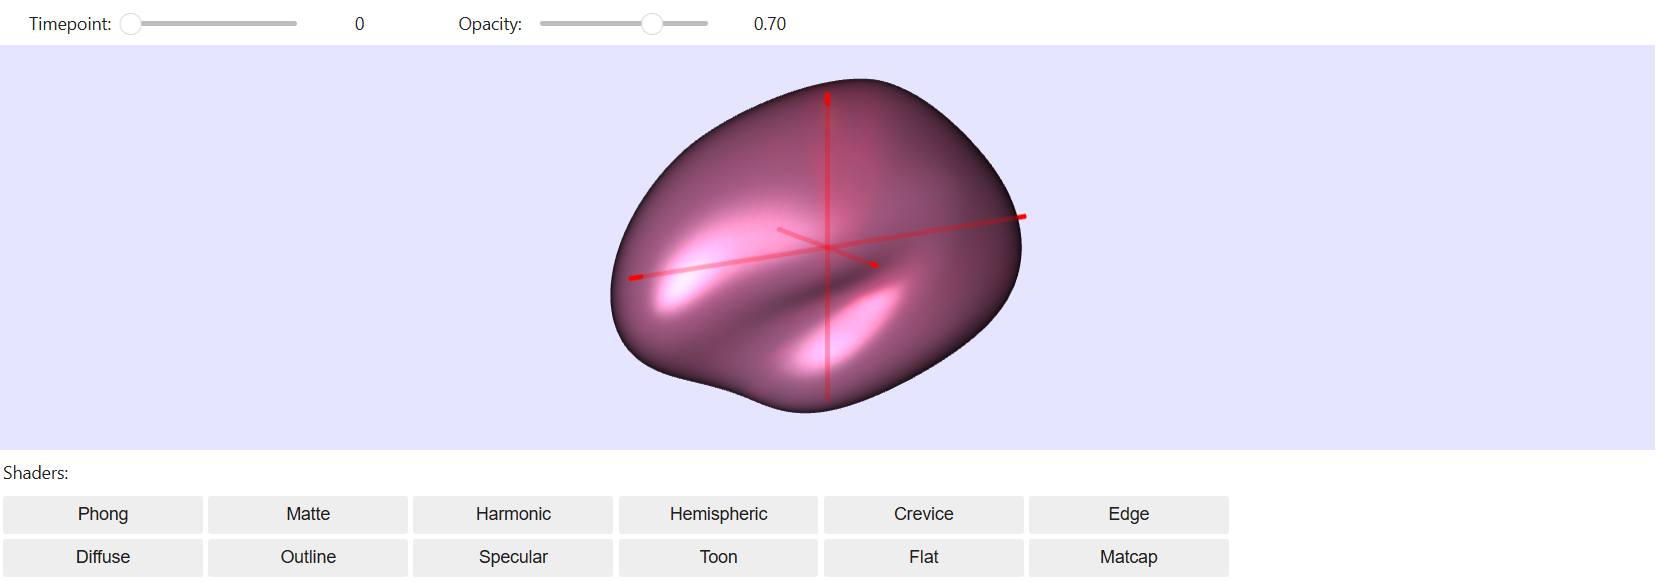

In [5]:
Image(filename='../../static/examples/workflows/ipyniivue_ipywidgets/05_cifti.png') 

### BrainVoyager
##### Rendering SRF Surfaces with SMP Curvature and Statistical Maps

This example uses a high-resolution cortical surface of the left hemisphere from BrainVoyager’s sample dataset. The surface mesh (`.srf`) represents the folded cortical geometry, and the accompanying scalar map (`.smp`) encodes per-vertex measurements such as curvature or statistical values. BrainVoyager uses native surface and surface-map formats, in which geometry and per-vertex data are stored as separate but directly corresponding files in a shared surface space. 

By loading the surface and associated scalar maps as layers in ipyniivue, the cortical mesh can be rendered with configurable colormaps, opacity settings, and mesh shaders, enabling visual inspection of surface-based measurements on the reconstructed anatomy.


This examples mirrors this [NiiVue demo](https://niivue.com/demos/features/brainvoyager.html)

In [21]:
# Initialize NiiVue
nv6 = ipyniivue.NiiVue()
nv6.opts.show_3d_crosshair = True
nv6.opts.back_color = [0, 0, 0, 1]

# Set Slice Type to Render
nv6.set_slice_type(ipyniivue.SliceType.RENDER)

# Load Mesh with a Layer (scalar information mapped onto the mesh)
mesh_layer = {
    "path": DATA_FOLDER / "sub-test02_left_hemisphere_4_curvature_maps.smp.gz",
    "colormap": "rocket",
    "cal_min": 0.0,
    "cal_max": 0.5,
    "opacity": 0.7,
}

nv6.load_meshes(
    [
        {
            "path": DATA_FOLDER / "sub-test02_left_hemisphere.srf.gz",
            "rgba255": [255, 255, 255, 255],
            "layers": [mesh_layer],
        }
    ]
)


# Create Interface Controls using ipywidgets

# Timepoint Slider
time_slider = widgets.IntSlider(min=0, max=3, value=0, description="Timepoint")


def on_time_change(change):
    """Handle time change."""
    if nv6.meshes:
        nv6.meshes[0].layers[0].frame_4d = change["new"]


time_slider.observe(on_time_change, names="value")

# Opacity Slider - controls how strongly the layer’s colors are blended with the underlying mesh, rather than making the surface physically transparent.
opacity_slider = widgets.FloatSlider(
    min=0.1, max=1.0, value=0.7, step=0.1, description="Opacity"
)


def on_opacity_change(change):
    """Handle opacity change."""
    if nv6.meshes:
        nv6.meshes[0].layers[0].opacity = change["new"]


opacity_slider.observe(on_opacity_change, names="value")

# Shader Selection (Dropdown)
shader_dropdown = widgets.Dropdown(
    options=nv6.mesh_shader_names(), value="Phong", description="Shader"
)


def on_shader_change(change):
    """Handle shader change."""
    if nv6.meshes:
        nv6.set_mesh_shader(nv6.meshes[0].id, change["new"])


shader_dropdown.observe(on_shader_change, names="value")

# Layout and Display
controls = widgets.VBox([time_slider, opacity_slider, shader_dropdown])
display(controls)
display(nv6)

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7fe…

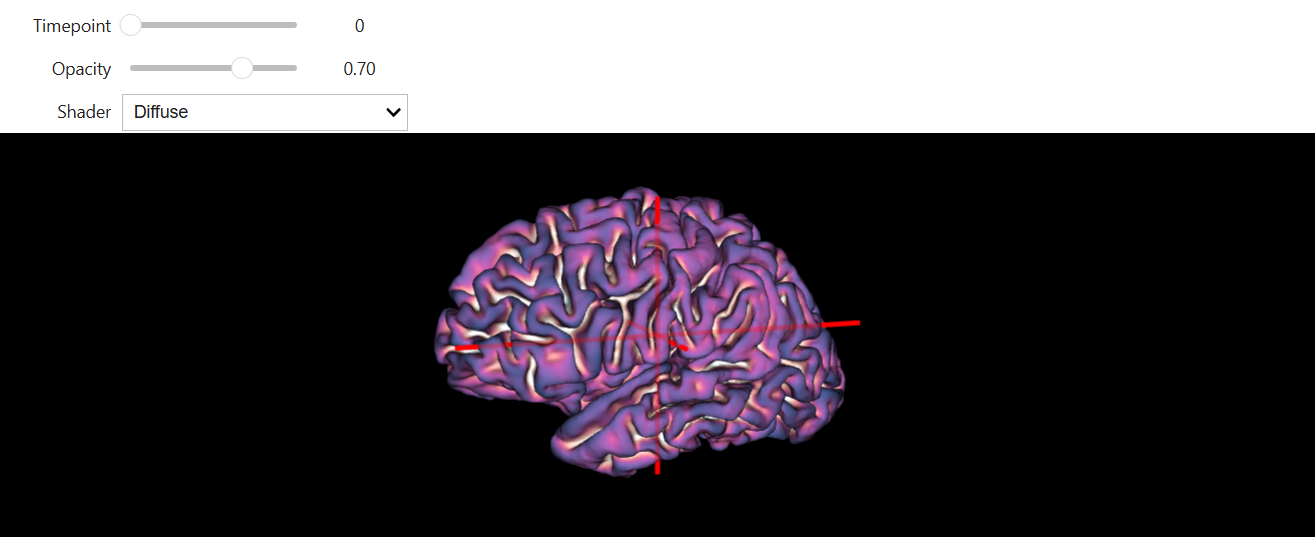

In [6]:
Image(filename='../../static/examples/workflows/ipyniivue_ipywidgets/06_brainvoyager.png') 

### Mesh curvature and Per-Vertex Scalars

This example demonstrates rendering an inflated cortical surface with a per-vertex curvature map. The inflated surface geometry is stored in a GIFTI file (`.surf.gii`), while the curvature data is provided as a CIFTI scalar file (`.dscalar.nii`), which assigns a scalar value to each vertex on the mesh. The inflated surface preserves the cortical topology while smoothing out folds, and the curvature layer encodes local folding patterns (gyrification) across the cortical sheet.

The curvature layer encodes local surface bending, providing a compact representation of sulcal and gyral structure in surface space. Interactive controls allow adjustment of layer opacity, application of MatCap textures, and selection of different mesh shaders, enabling flexible visualization of surface geometry together with vertex-wise scalar data. This example illustrates how NiiVue combines surface meshes and per-vertex measurements for surface-based visualization.


This example mirrors this [NiiVue demo](https://niivue.com/demos/features/mesh.curv.html).

In [23]:
# Initialize viewer
nv7 = NiiVue()
nv7.opts.back_color = [1, 1, 1, 1]
nv7.opts.show_3d_crosshair = True

#  UI Controls
opacity_slider = widgets.FloatSlider(
    min=0, max=1.0, value=222/255, description="Curve", continuous_update=True
)

high_dpi_check = widgets.Checkbox(value=False, description="HighDPI")

matcap_names = ["Shiny", "Cortex", "Cream", "Fuzzy", "Peach", "Plastic"]
matcap_dropdown = widgets.Dropdown(
    options=matcap_names, value="Shiny", description="MatCap"
)

shader_dropdown = widgets.Dropdown(
    options=nv7.mesh_shader_names(), value="Matcap", description="Shaders"
)

# Callbacks
def on_opacity_change(change):
    if nv7.meshes:
        nv7.set_mesh_layer_property(nv7.meshes[0].id, 0, "opacity", change["new"])

def on_high_dpi_change(change):
    nv7.set_high_resolution_capable(bool(change["new"]))

def on_matcap_change(change):
    if nv7.meshes:
        nv7.set_mesh_shader(nv7.meshes[0].id, "Matcap")
        shader_dropdown.value = "Matcap"
        name = change["new"]
        matcap_path = MATCAP_FOLDER / f"{name}.jpg"
        with open(matcap_path, "rb") as f:
            nv7.load_mat_cap_texture(f.read())

def on_shader_change(change):
    if nv7.meshes:
        nv7.set_mesh_shader(nv7.meshes[0].id, change["new"])

opacity_slider.observe(on_opacity_change, names="value")
high_dpi_check.observe(on_high_dpi_change, names="value")
matcap_dropdown.observe(on_matcap_change, names="value")
shader_dropdown.observe(on_shader_change, names="value")

# Load mesh
mesh_layer = {
    "path": DATA_FOLDER / "fs_LR.32k.LR.curvature.dscalar.nii",
    "colormap": "gray",
    "cal_min": -0.15,
    "cal_max": -0.001,
    "opacity": 222/255,
}

nv7.load_meshes([
    {
        "path": DATA_FOLDER / "fs_LR.32k.L.inflated.surf.gii",
        "layers": [mesh_layer],
    }
])

on_matcap_change({"new": "Shiny"})

# Display
display(
    widgets.VBox([
        widgets.HBox([opacity_slider, high_dpi_check]),
        nv7,
        widgets.HBox([shader_dropdown, matcap_dropdown])
    ])
)

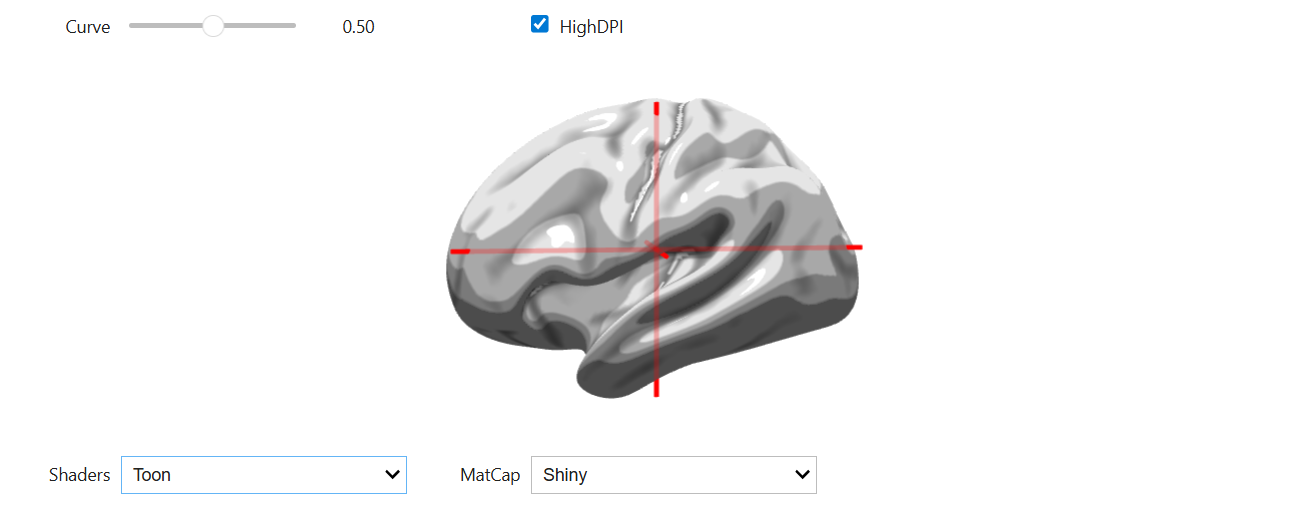

In [7]:
Image(filename='../../static/examples/workflows/ipyniivue_ipywidgets/07_mesh_curv.png') 

## 4. Tractography
### DSI-Studio tiny-tract files (TT)
This example demonstrates interactive visualization of diffusion MRI tractography. The tractography data is stored as a TinyTrack file (`.tt.gz`), a compact format used in DSI Studio to store track coordinates. Fiber tracts are represented as 3D streamline meshes, and a background anatomical volume (MNI152 template) provides spatial context. Interactive controls allow you to adjust fiber radius for visibility, apply dither to reduce visual clutter in dense fiber bundles, select color schemes (Global for direction-based coloring, Local for tract-specific patterns, or Fixed for uniform color), control X-ray transparency to see through tracts, and switch rendering shaders to explore different visual styles. These controls enable detailed examination of white matter pathway organization and geometry.


The background anatomy is provided as a standard NIfTI volume. Fiber tracts are represented as 3D streamline meshes, and a background anatomical volume provides spatial context. You can adjust fiber radius, apply dither, select color schemes, control X-ray transparency, and switch shaders to explore the organization and geometry of the fiber pathways.

This example mirrors this [NiiVue demo](https://niivue.com/demos/features/tracts.dsi.html).

In [25]:
# Initialize
nv8 = NiiVue()
nv8.opts.back_color = [0, 0, 0, 1]
nv8.opts.show_3d_crosshair = True
nv8.opts.drag_mode = DragMode.PAN
nv8.opts.multiplanar_show_render = ShowRender.ALWAYS
nv8.opts.yoke_3d_to_2d_zoom = True

# Load volume and mesh via local path
nv8.load_volumes([{"path": DATA_FOLDER / "mni152.nii.gz"}])
nv8.load_meshes([{"path": DATA_FOLDER / "TR_S_R.tt.gz", "rgba255": [0, 255, 255, 255]}])

# Optional: configure viewer
nv8.set_clip_plane(0.05, 0, 90)

# Widgets
fiber_radius = widgets.FloatSlider(min=0, max=20, value=5, description="Radius")
fiber_dither = widgets.FloatSlider(min=0, max=10, value=0, description="Dither")
fiber_color = widgets.Dropdown(
    options=["Global", "Local", "Fixed"], value="Global", description="Fiber Color"
)
x_ray = widgets.FloatSlider(min=0, max=5, value=0, description="XRay")
shader_dropdown = widgets.Dropdown(
    options=nv8.mesh_shader_names(), value="Specular", description="Shaders"
)


# Handlers
def on_radius_change(change):
    """Handle radius change."""
    if nv8.meshes:
        nv8.set_mesh_property(nv8.meshes[0].id, "fiber_radius", change["new"] * 0.1)


def on_dither_change(change):
    """Handle dither change."""
    if nv8.meshes:
        nv8.set_mesh_property(nv8.meshes[0].id, "fiber_dither", change["new"] * 0.1)


def on_color_change(change):
    """Handle fiber color change."""
    if nv8.meshes:
        nv8.set_mesh_property(nv8.meshes[0].id, "fiber_color", change["new"])


def on_xray_change(change):
    """Handle xray change."""
    nv8.opts.mesh_xray = change["new"] / 20.0


def on_shader_change(change):
    """Handle shader change."""
    if nv8.meshes:
        nv8.set_mesh_shader(nv8.meshes[0].id, change["new"])


# Bind Observers
fiber_radius.observe(on_radius_change, names="value")
fiber_dither.observe(on_dither_change, names="value")
fiber_color.observe(on_color_change, names="value")
x_ray.observe(on_xray_change, names="value")
shader_dropdown.observe(on_shader_change, names="value")

# Auto-set defaults
on_radius_change({"new": fiber_radius.value})
on_dither_change({"new": fiber_dither.value})
on_color_change({"new": fiber_color.value})
on_xray_change({"new": x_ray.value})
on_shader_change({"new": shader_dropdown.value})

# Layout
controls = widgets.VBox(
    [fiber_radius, fiber_dither, fiber_color, x_ray, shader_dropdown]
)
display(widgets.VBox([controls, nv8]))

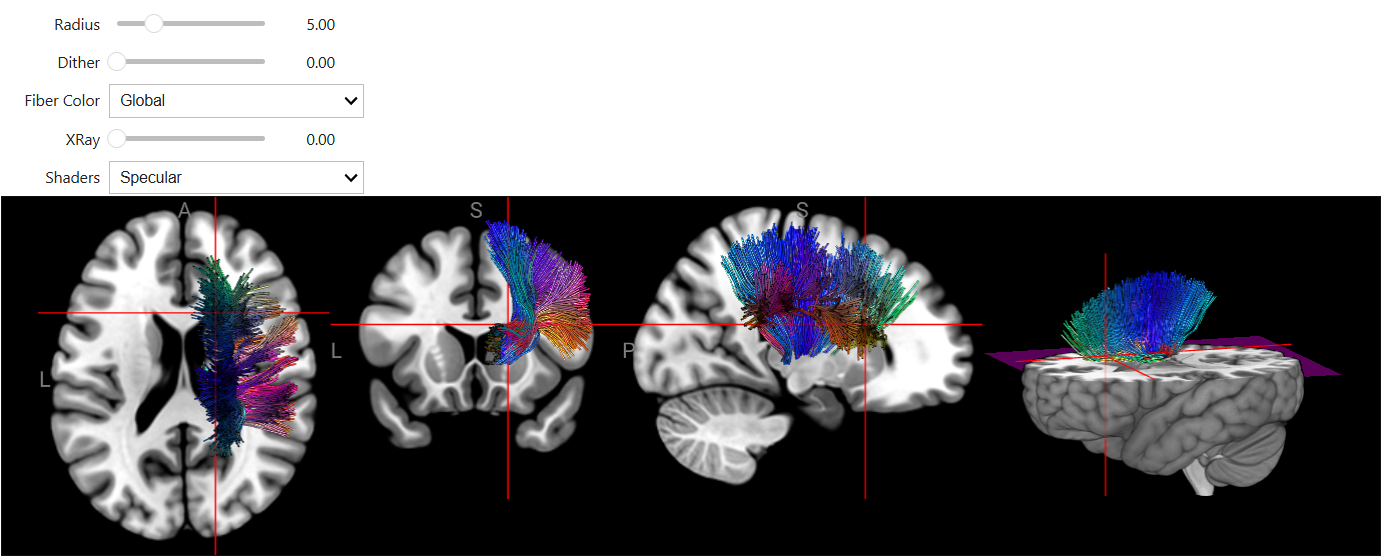

In [8]:
Image(filename='../../static/examples/workflows/ipyniivue_ipywidgets/08_dsi_tractography.png') 

### Advanced Tractography with Multiple Formats and Brain Surface
This example demonstrates advanced visualization combining multiple tractography datasets with anatomical surface rendering. Three white matter tracts are loaded from different file formats—VTK, TRK, and TCK—representing the right frontal aslant tract (FAT_R), inferior fronto-occipital fasciculus (IFOF_R), and superior longitudinal fasciculus (SLF1_R). A semi-transparent brain surface mesh (MZ3 format) provides anatomical context. Interactive controls allow you to adjust the shader applied to the brain surface for different visual styles, modify fiber coloring schemes (Global for direction-based coloring across the entire scene, Local for per-tract directional coloring, or Fixed to use each tract's assigned color), change fiber radius for better visibility, and control X-ray transparency to see internal structures through the brain surface. This setup is useful for examining the spatial relationships between multiple fiber pathways and cortical anatomy, demonstrating interoperability across common tractography file formats.

This example mirrors this [NiiVue demo](https://niivue.com/demos/features/tracts2.html).


In [27]:
# Initialize NiiVue
nv9 = NiiVue()
nv9.opts.show_3d_crosshair = True
nv9.opts.back_color = [0, 0, 0, 1]
nv9.opts.is_orient_cube = True
nv9.opts.slice_type = SliceType.RENDER
nv9.opts.yoke_3d_to_2d_zoom = True

# Load volume
nv9.add_volume({"path": DATA_FOLDER / "mni152.nii.gz"})

# Load meshes
meshes = [
    # Tract 0
    {"path": DATA_FOLDER / "tract.FAT_R.vtk", "rgba255": [180, 180, 0, 255]},
    # Tract 1
    {"path": DATA_FOLDER / "tract.IFOF_R.trk", "rgba255": [0, 255, 0, 255]},
    # Tract 2
    {"path": DATA_FOLDER / "tract.SLF1_R.tck", "rgba255": [0, 0, 255, 255]},
    # Brain Mesh (Index 3)
    {
        "path": DATA_FOLDER / "BrainMesh_ICBM152.lh.mz3",
        "rgba255": [242, 174, 177, 255],
        "opacity": 0.2,
    },
]
nv9.load_meshes(meshes)

# Set initial scene props
nv9.set_clip_plane(-0.1, 0, 90)
nv9.set_render_azimuth_elevation(135, 15)

# Create ui widgets
shader_drop = widgets.Dropdown(
    options=["Edge", "Flat", "Matcap", "Matte", "Outline", "Phong", "Toon"],
    value="Outline",
    description="Shader:",
)

color_drop = widgets.Dropdown(
    options=[
        ("Global direction", "Global"),
        ("Local direction", "Local"),
        ("Fixed", "Fixed"),
    ],
    value="Fixed",
    description="Color:",
)

fiber_radius = widgets.FloatSlider(
    min=0, max=2.0, step=0.1, value=0, description="Radius"
)

xray_slider = widgets.FloatSlider(
    min=0, max=0.2, step=0.01, value=0.1, description="MeshXRay"
)

zoom_slider = widgets.FloatSlider(
    min=0.1, max=2.0, step=0.1, value=1.0, description="Zoom"
)


# Define callbacks
def on_shader_change(change):
    """Apply shader to the brain mesh (index 3)."""
    if len(nv9.meshes) > 3:
        nv9.set_mesh_shader(nv9.meshes[3].id, change["new"])


def on_color_change(change):
    """Apply fiber color to the tracts (indices 0, 1, 2)."""
    val = change["new"]
    for i in range(3):
        if i < len(nv9.meshes):
            nv9.meshes[i].fiber_color = val


def on_radius_change(change):
    """Apply radius to the tracts (indices 0, 1, 2)."""
    val = change["new"]
    for i in range(3):
        if i < len(nv9.meshes):
            nv9.meshes[i].fiber_radius = val


def on_xray_change(change):
    """Handle xray change."""
    nv9.opts.mesh_xray = change["new"]


# Bind Callbacks
shader_drop.observe(on_shader_change, names="value")
color_drop.observe(on_color_change, names="value")
fiber_radius.observe(on_radius_change, names="value")
xray_slider.observe(on_xray_change, names="value")

# Set Initial Values
nv9.opts.mesh_xray = xray_slider.value

for i in range(3):
    nv9.meshes[i].fiber_color = color_drop.value
    nv9.meshes[i].fiber_radius = fiber_radius.value

nv9.set_mesh_shader(nv9.meshes[3].id, shader_drop.value)


# Display all
ui = widgets.VBox(
    [
        widgets.HBox([shader_drop, color_drop]),
        widgets.HBox([fiber_radius, xray_slider]),
        nv9,
    ]
)

display(ui)

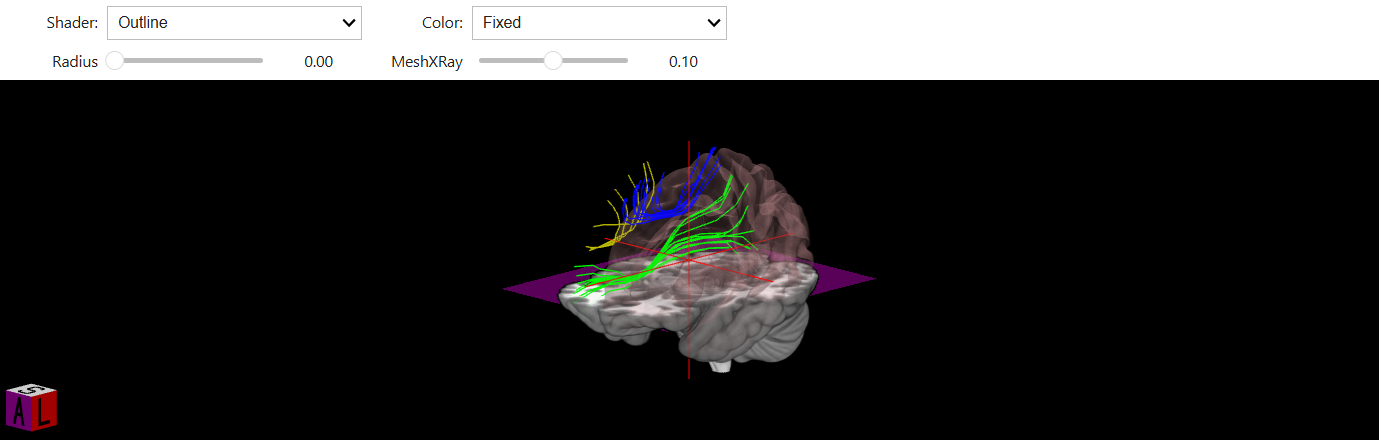

In [9]:
Image(filename='../../static/examples/workflows/ipyniivue_ipywidgets/09_advanced_tractography.png') 

### Dependencies in Jupyter/Python
- Using the package [watermark](https://github.com/rasbt/watermark) to document system environment and software versions used in this notebook

In [17]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2025-12-16T12:51:57.193365+00:00

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.6.0

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 5.4.0-204-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

IPython   : 9.6.0
ipywidgets: 8.1.7
ipyniivue : 2.3.2

